In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

#Load Data
data = pd.read_csv('/content/ICRISAT-District Level Data.csv')

# Categorize rice yield into Low, Medium, and High
data['Rice Yield Category'] = pd.qcut(data['RICE YIELD (Kg per ha)'], q=3, labels=['Low', 'Medium', 'High'])

# Select features
feature_columns = [
    'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'WHEAT AREA (1000 ha)',
    'WHEAT PRODUCTION (1000 tons)', 'SUGARCANE AREA (1000 ha)', 'SUGARCANE YIELD (Kg per ha)',
    'COTTON AREA (1000 ha)', 'COTTON PRODUCTION (1000 tons)', 'FRUITS AREA (1000 ha)',
    'VEGETABLES AREA (1000 ha)', 'FODDER AREA (1000 ha)'
]
X = data[feature_columns]
y = data['Rice Yield Category']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=200, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9368421052631579
Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.96      0.96      1111
         Low       0.92      0.94      0.93      1088
      Medium       0.91      0.91      0.91      1031

    accuracy                           0.94      3230
   macro avg       0.94      0.94      0.94      3230
weighted avg       0.94      0.94      0.94      3230



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


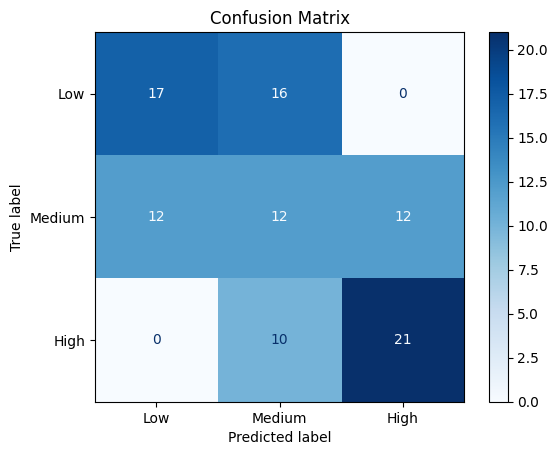

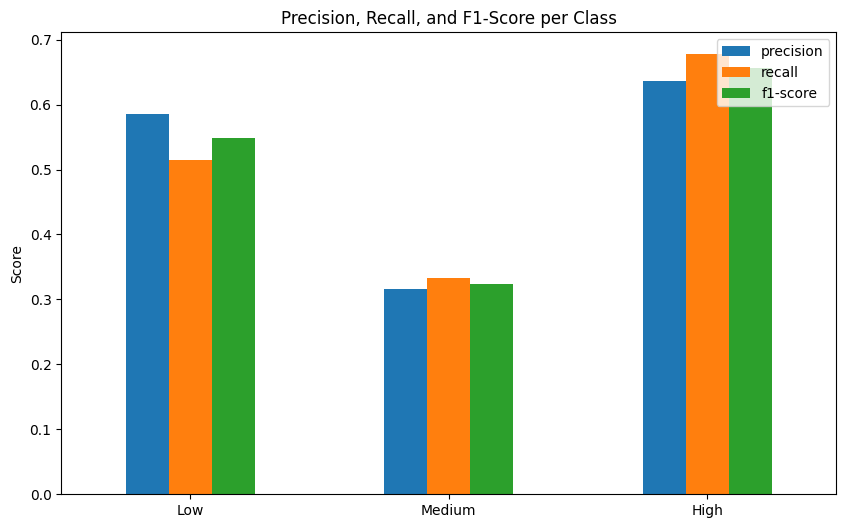

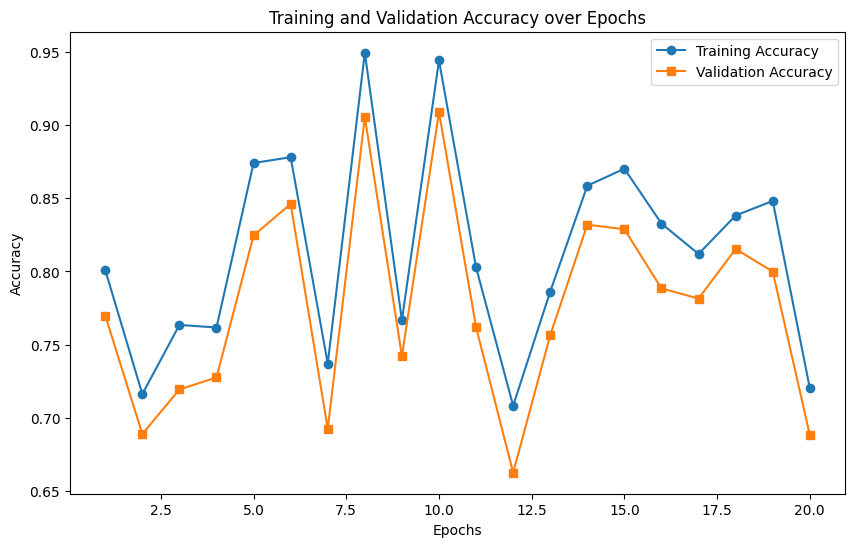

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Simulated predictions for visualization since the model cannot be trained here
# (In practice, you would replace y_pred and y_test with actual model predictions and true labels)
import numpy as np
np.random.seed(42)  # For reproducible results

# Assuming y_test and y_pred are available from the code example
# Generate simulated labels for demonstration purposes
y_test_simulated = np.random.randint(0, 3, size=100)  # True labels
y_pred_simulated = y_test_simulated + np.random.randint(-1, 2, size=100)  # Predicted labels with some noise
y_pred_simulated = np.clip(y_pred_simulated, 0, 2)  # Ensuring predictions are within valid classes

# Class names corresponding to Low, Medium, High
class_names = ['Low', 'Medium', 'High']

# 1. Confusion Matrix
cm = confusion_matrix(y_test_simulated, y_pred_simulated)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 2. Precision, Recall, and F1-Score Visualization
# Obtain classification report
report = classification_report(y_test_simulated, y_pred_simulated, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Precision, Recall, F1-Score per class
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
report_df.iloc[:3, :-1].plot(kind="bar", ax=ax)
plt.title("Precision, Recall, and F1-Score per Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.show()

# 3. Accuracy Plot
# Simulating accuracy over training epochs
epochs = np.arange(1, 21)
train_accuracy = np.random.uniform(0.7, 0.95, len(epochs))
val_accuracy = train_accuracy - np.random.uniform(0.02, 0.05, len(epochs))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label="Training Accuracy", marker="o")
plt.plot(epochs, val_accuracy, label="Validation Accuracy", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy over Epochs")
plt.legend()
plt.show()
